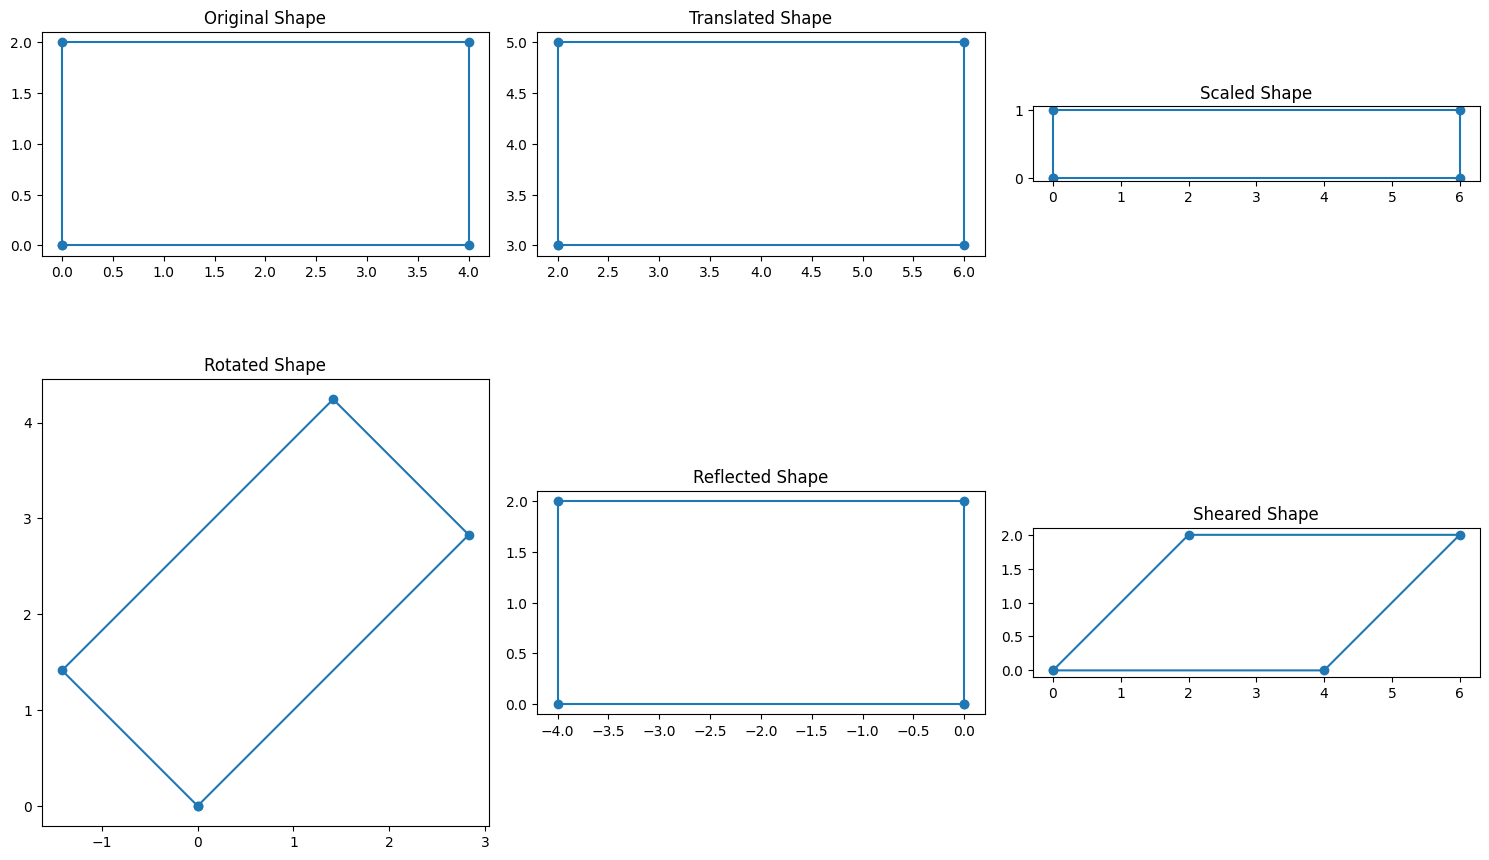

In [1]:
import numpy as np
import matplotlib.pyplot as plt
rectangle = np.array([
    [0, 0, 1],
    [4, 0, 1],
    [4, 2, 1],
    [0, 2, 1],
    [0, 0, 1]
])

def plot_shape(shape, title, ax):
    ax.plot(shape[:, 0], shape[:, 1], marker='o')
    ax.set_title(title)
    ax.set_aspect('equal', adjustable='box')

def translate(shape, tx, ty):
    T = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    return shape @ T.T

def scale(shape, sx, sy):
    S = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    return shape @ S.T

def rotate(shape, theta):
    rad = np.radians(theta)
    R = np.array([
        [np.cos(rad), -np.sin(rad), 0],
        [np.sin(rad), np.cos(rad), 0],
        [0, 0, 1]
    ])
    return shape @ R.T

def reflect(shape, axis):
    if axis == "x":
        R = np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    elif axis == "y":
        R = np.array([
            [-1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ])
    elif axis == "origin":
        R = np.array([
            [-1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    return shape @ R.T

def shear(shape, sh_x=0, sh_y=0):
    Sh = np.array([
        [1, sh_x, 0],
        [sh_y, 1, 0],
        [0, 0, 1]
    ])
    return shape @ Sh.T

def composite_transform(shape, tx, ty, theta):
    translated = translate(shape, tx, ty)
    return rotate(translated, theta)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
plot_shape(rectangle, "Original Shape", axes[0, 0])
plot_shape(translate(rectangle, 2, 3), "Translated Shape", axes[0, 1])
plot_shape(scale(rectangle, 1.5, 0.5), "Scaled Shape", axes[0, 2])
plot_shape(rotate(rectangle, 45), "Rotated Shape", axes[1, 0])
plot_shape(reflect(rectangle, "y"), "Reflected Shape", axes[1, 1])
plot_shape(shear(rectangle, sh_x=1), "Sheared Shape", axes[1, 2])
plt.tight_layout()
plt.show()


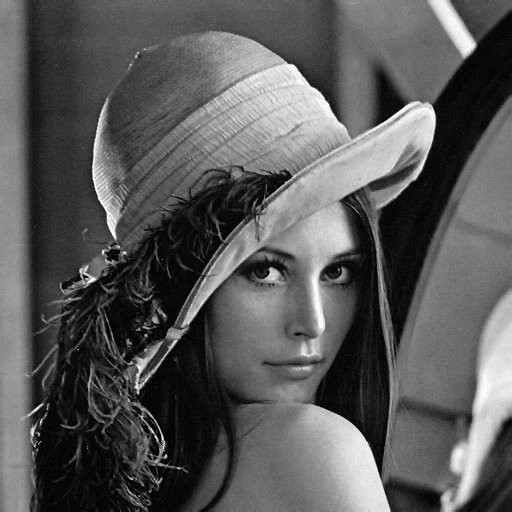

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('lab1_image.jpg',0)

cv2_imshow(image)


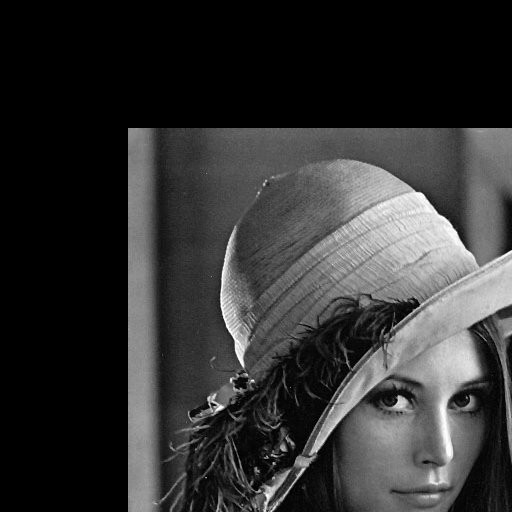

In [ ]:
#Translation
import numpy as np

height, width = image.shape[:2]

quarter_height, quarter_width = height / 4, width / 4

T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])

img_t = cv2.warpAffine(image, T, (width, height))

cv2_imshow(img_t)

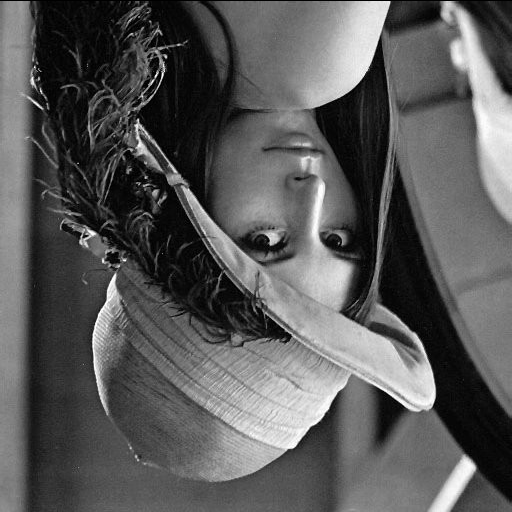

In [ ]:
#Reflection
rows, cols = image.shape
M = np.float32([[1,  0, 0],
                [0, -1, rows],
                [0,  0, 1]])
reflected_img = cv2.warpPerspective(image, M,
                                   (int(cols),
                                    int(rows)))
cv2_imshow(reflected_img)

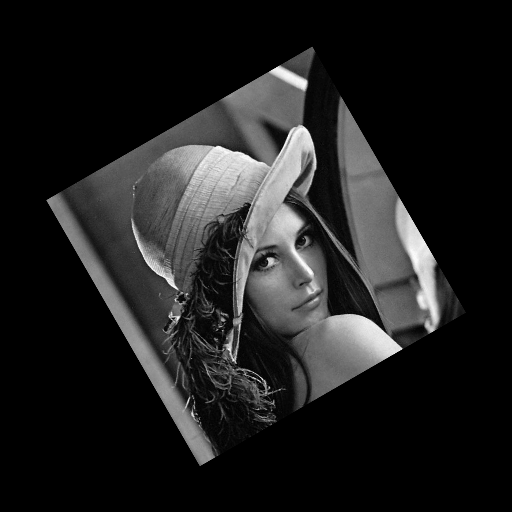

In [ ]:
#Rotation
rows, cols = image.shape
M = np.float32([[1,  0, 0], [0, -1, rows], [0,  0, 1]])
img_rotation = cv2.warpAffine(image,
                             cv2.getRotationMatrix2D((cols/2, rows/2),
                                                    30, 0.6),
                             (cols, rows))
cv2_imshow(img_rotation)

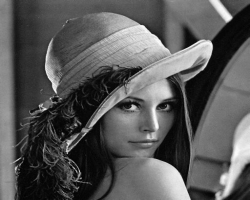

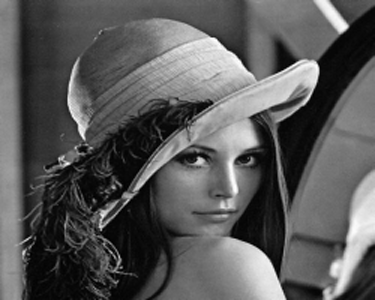

In [ ]:
#Scaling
rows, cols = image.shape
img_shrinked = cv2.resize(image, (250, 200),
                         interpolation=cv2.INTER_AREA)
cv2_imshow( img_shrinked)
img_enlarged = cv2.resize(img_shrinked, None,
                         fx=1.5, fy=1.5,
                         interpolation=cv2.INTER_CUBIC)
cv2_imshow(img_enlarged)

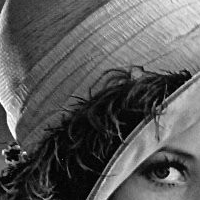

In [ ]:
#Cropping
cropped_img = image[100:300, 100:300]
cv2_imshow(cropped_img)

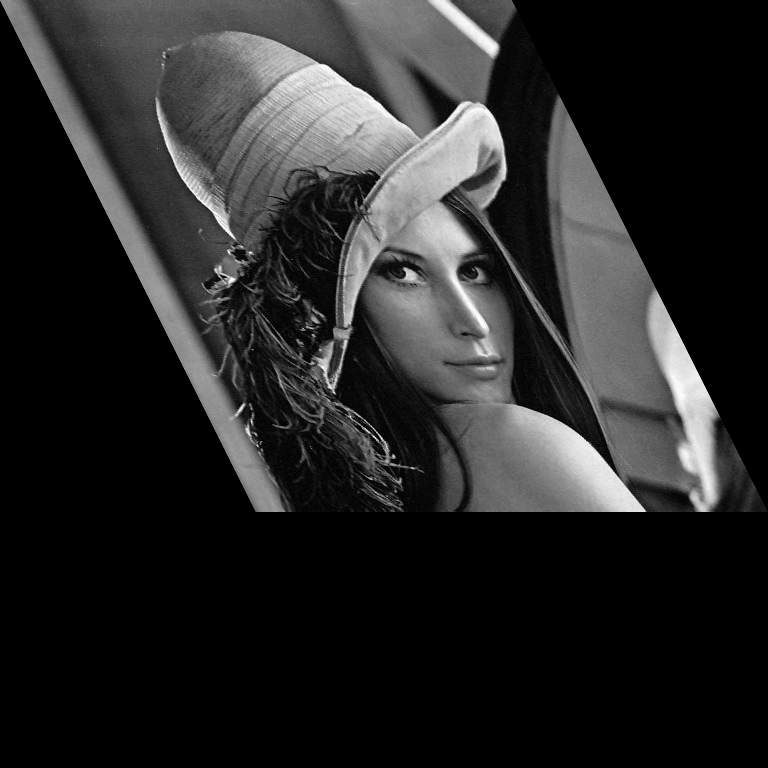

In [ ]:
#Shearing x-axis
rows, cols = image.shape
M = np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])
sheared_img = cv2.warpPerspective(image, M, (int(cols*1.5), int(rows*1.5)))
cv2_imshow(sheared_img)

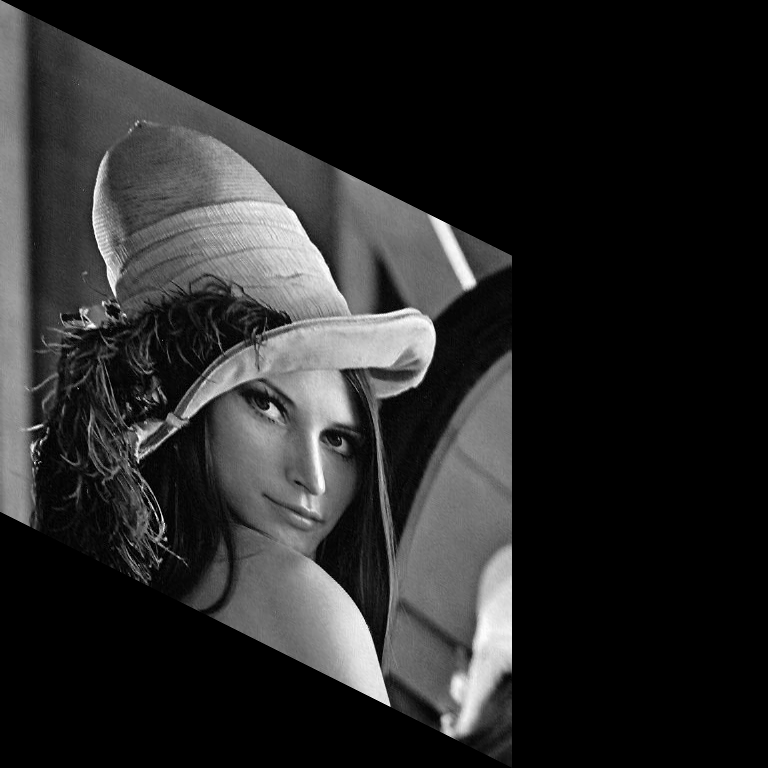

In [ ]:
#Shearing y-axis
rows, cols = image.shape
M = np.float32([[1,   0, 0], [0.5, 1, 0], [0,   0, 1]])
sheared_img = cv2.warpPerspective(image, M, (int(cols*1.5), int(rows*1.5)))
cv2_imshow(sheared_img)
cv2.waitKey(0)
cv2.destroyAllWindows()